In [106]:
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sympy.abc import R
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df_gc = pd.DataFrame(ground_cricket_data)
df_gc.head(1)

,Chirps/Second,Ground Temperature
0,20,88.6


In [3]:
regr_gc = linear_model.LinearRegression()
ground_temp = df_gc[['Ground Temperature']]
chirps_sec = df_gc['Chirps/Second']
regr_gc.fit(ground_temp, chirps_sec)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'.format(regr_gc.coef_[0], regr_gc.intercept_))

Linear Regression Equation: y = 0.2030 * x + 0.4593


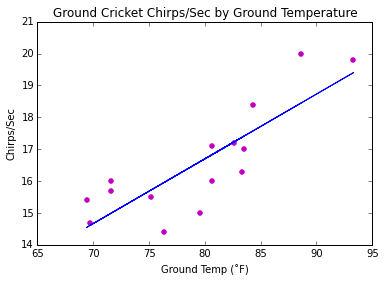

In [5]:
plt.scatter(ground_temp, chirps_sec, color='m')
plt.plot(ground_temp, regr_gc.predict(ground_temp))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [104]:
print('R^2 score for this equation: {:.4f}'.format(regr_gc.score(ground_temp, chirps_sec)))

R^2 score for this equation: 0.6923


Because this is below 0.8, this is not a good fit for this data.

In [7]:
print('At 95˚F, our approximation of chirps/sec is: {:.4f}'.format(regr_gc.predict(95)[0]))

At 95˚F, our approximation of chirps/sec is: 19.7443


y = m * x + b

y - b = m * x

(y - b) / m = x

x = (y - b) / m

In [8]:
def chirps_to_temp(y):
    ret = (y - regr_gc.intercept_) / regr_gc.coef_[0]
    print('With an observation of {} chirps/sec, we expect a ground temp of {:.2f}˚F'.format(y, ret))

In [9]:
chirps_to_temp(18)

With an observation of 18 chirps/sec, we expect a ground temp of 86.41˚F


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

In [10]:
df_bb = pd.read_fwf("brain_body.txt")

In [17]:
df_bb.head(1)

,Brain,Body
0,3.385,44.5


In [14]:
regr_bb = linear_model.LinearRegression()
body = df_bb[['Body']]
brain = df_bb['Brain']
regr_bb.fit(body, brain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'.format(regr_bb.coef_[0], regr_bb.intercept_))

Linear Regression Equation: y = 0.9029 * x + -56.8555


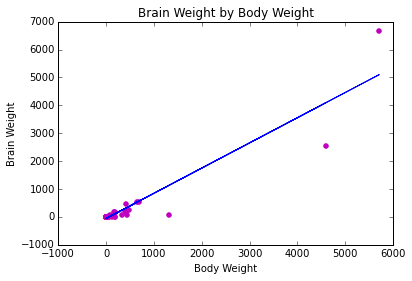

In [36]:
plt.scatter(body, brain, color='m')
plt.plot(body, regr_bb.predict(body))
plt.title('Brain Weight by Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

In [20]:
print('R^2 score for this equation: {:.4f}'.format(regr_bb.score(body, brain)))

R^2 score for this equation: 0.8727


This score is greater than 0.8, so it _is_ a good fit for this data.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

In [11]:
df_sd = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [22]:
df_sd.head(1)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350


In [82]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [90]:
def lin_reg_eq_print(salary_discrim_cols):
    input_cols = df_sd[salary_discrim_cols]
    salary = df_sd['Salary']
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(salary_discrim_cols, regr_sd.coef_, regr_sd.intercept_))

In [91]:
lin_reg_eq_print(salary_discrim_cols)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354] + 11410.146547255601


In [88]:
def lin_reg_wrt_salary(salary_discrim_cols):
    input_cols = df_sd[salary_discrim_cols]
    salary = df_sd['Salary']
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    return regr_sd.score(input_cols, salary)

In [93]:
print('R^2 score for equation using all columns: {}'.format(lin_reg_wrt_salary(salary_discrim_cols)))

R^2 score for equation using all columns: 0.8547180674410969


In [112]:
combos = [it.combinations(salary_discrim_cols, n + 1) for n in range(len(salary_discrim_cols))]

In [115]:
list(combos[0])

[('Sex',), ('Rank',), ('Year',), ('Degree',), ('YSdeg',)]

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.